# Embedding's for MovieLens dataset

## Описание задачи

Необходимо построить векторное представление пользователей и фильмов используя нейросетевые подходы, чтобы можно было по эмбендингу пользователя искать похожие эмбендинги фильмов и рекомендовать ему их.

Обратить внимание на:

1. Какие данных на обучение и валидацию, обоснование.
2. Выбор и обоснование метрики
3. Разработка архитектуры нейронной сети с пояснением
4. Обучение и валидация
5. Решение должно быть воспроизводимым с подробными комментариями на каждом шаге

## Описание данных

*Полный* датасет MovieLens с сайта grouplens.org: https://files.grouplens.org/datasets/movielens/ml-latest.zip

В датасете содержится информация о фильмах, оценках пользователей и тегах фильмов.


Структура файла данных рейтингов (ratings.csv)
-----------------------------------------

Все рейтинги содержатся в файле `ratings.csv`. Каждая строка этого файла после строки заголовка представляет собой одну оценку одного фильма одним пользователем и имеет следующий формат:

    userId,movieId,rating,timestamp

Строки в этом файле упорядочены сначала по идентификатору пользователя, затем, внутри пользователя, по идентификатору фильма.

Оценки выставляются по 5-звездочной шкале, с шагом в ползвезды (0,5 звезды - 5,0 звезды).

Временные метки представляют собой секунды с полуночи по всемирному координированному времени (UTC) от 1 января 1970 года.


Структура файла данных тегов (tags.csv)
-----------------------------------

Все теги содержатся в файле `tags.csv`. Каждая строка этого файла после строки заголовка представляет собой один тег, примененный к одному фильму одним пользователем, и имеет следующий формат:

    userId,movieId,tag,timestamp

Строки в этом файле упорядочены сначала по userId, затем, внутри пользователя, по movieId.

Теги - это созданные пользователем метаданные о фильмах. Каждый тег обычно представляет собой одно слово или короткую фразу. Смысл, значение и цель конкретного тега определяется каждым пользователем.

Временные метки представляют собой секунды с полуночи по всемирному координированному времени (UTC) от 1 января 1970 года.


Структура файла данных фильмов (movies.csv)
---------------------------------------

Информация о фильмах содержится в файле `movies.csv`. Каждая строка этого файла после строки заголовка представляет один фильм и имеет следующий формат:

    movieId,title,genres

Названия фильмов вводятся вручную или импортируются из <https://www.themoviedb.org/> и включают год выпуска в круглых скобках. В этих названиях могут быть ошибки и несоответствия.

Жанры представляют собой список, разделенный трубкой, и выбираются из следующих:

* боевик
* Приключения
* Анимация
* Детские
* Комедия
* Криминал
* Документальный
* Драма
* Фэнтези
* Фильм-нуар
* Ужасы
* Мюзикл
* Мистерия
* Романтика
* Научная фантастика
* Триллер
* Война
* Вестерн
* (жанры не указаны)


Структура файла данных ссылок (links.csv)
---------------------------------------

Идентификаторы, которые могут быть использованы для ссылок на другие источники данных о фильмах, содержатся в файле `links.csv`. Каждая строка этого файла после строки заголовка представляет один фильм и имеет следующий формат:

    movieId,imdbId,tmdbId

movieId - это идентификатор для фильмов, используемых <https://movielens.org>. Например, фильм "История игрушек" имеет ссылку <https://movielens.org/movies/1>.

imdbId - это идентификатор для фильмов, используемых <http://www.imdb.com>. Например, фильм "История игрушек" имеет ссылку <http://www.imdb.com/title/tt0114709/>.

tmdbId - идентификатор для фильмов, используемых <https://www.themoviedb.org>. Например, фильм "История игрушек" имеет ссылку <https://www.themoviedb.org/movie/862>.

Использование перечисленных выше ресурсов регулируется условиями каждого поставщика.


Геном тегов (genome-scores.csv и genome-tags.csv)
-------------------------------------------------

Этот набор данных включает текущую копию генома тегов.

[genome-paper]: http://files.grouplens.org/papers/tag_genome.pdf

Геном тегов - это структура данных, которая содержит оценки релевантности тегов для фильмов.  Структура представляет собой плотную матрицу: каждый фильм в геноме имеет значение для *каждого* тега в геноме.

Как описано в [этой статье][genome-paper], геном тегов кодирует, насколько сильно фильмы проявляют определенные свойства, представленные тегами (атмосферность, заставляющие задуматься, реалистичность и т.д.). Геном тегов был вычислен с помощью алгоритма машинного обучения на пользовательском контенте, включая теги, рейтинги и текстовые рецензии.

Геном разделен на два файла.  Файл `genome-scores.csv` содержит данные о релевантности тегов фильма в следующем формате:

    movieId,tagId,relevance

Второй файл, `genome-tags.csv`, содержит описания тегов для идентификаторов тегов в файле генома в следующем формате:

    tagId,tag

Значения `tagId` генерируются при экспорте набора данных, поэтому они могут отличаться в разных версиях наборов данных MovieLens.

При ссылке на геномные данные тегов, пожалуйста, указывайте следующую цитату:

> Jesse Vig, Shilad Sen, and John Riedl. 2012. The Tag Genome: Кодирование знаний сообщества для поддержки новых взаимодействий. ACM Trans. Interact. Intell. Syst. 2, 3: 13:1-13:44. <https://doi.org/10.1145/2362394.2362395>

## Анализ данных

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense , Concatenate, Dot
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical
from keras.utils.vis_utils import model_to_dot
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.models import Model


# specifically for deeplearning.
from keras.layers import Dropout, Flatten,Activation,Input,Embedding
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
import tensorflow as tf
import random as rn
from IPython.display import SVG

In [31]:
df = pd.read_csv('ml-latest/ratings.csv')

In [32]:
# get only 100_000 rows without random
df = df[:100_000]

In [33]:
df.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100000 non-null  int64  
 1   movieId    100000 non-null  int64  
 2   rating     100000 non-null  float64
 3   timestamp  100000 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [35]:
df = df.rename(columns={'userId': 'user_id', 'movieId': 'movie_id'})

In [36]:
rating_pre_user = df.groupby('user_id')['rating'].count()
rating_pre_movie = df.groupby('movie_id')['rating'].count()

print(f'Количество пользователей: {len(rating_pre_user)}')
print(f'Количество фильмов: {len(rating_pre_movie)}')
print()

print(f'Максимальная оценка: {df["rating"].max()}')
print(f'Минимальная оценка: {df["rating"].min()}')
print(f'Медианная оценка: {df["rating"].median()}')
print(f'Количество оценок: {df["rating"].count()}')
print()

print(f'Максимальное количество оценок на пользователя: {rating_pre_user.max()}')
print(f'Минимальное количество оценок на пользователя: {rating_pre_user.min()}')
print(f'Медианное количество оценок на пользователя: {rating_pre_user.median()}')
print()

print(f'Максимальное количество оценок на фильм: {rating_pre_movie.max()}')
print(f'Минимальное количество оценок на фильм: {rating_pre_movie.min()}')
print(f'Медианное количество оценок на фильм: {rating_pre_movie.median()}')

del rating_pre_user, rating_pre_movie

Количество пользователей: 1041
Количество фильмов: 9289

Максимальная оценка: 5.0
Минимальная оценка: 0.5
Медианная оценка: 4.0
Количество оценок: 100000

Максимальное количество оценок на пользователя: 1740
Минимальное количество оценок на пользователя: 1
Медианное количество оценок на пользователя: 29.0

Максимальное количество оценок на фильм: 350
Минимальное количество оценок на фильм: 1
Медианное количество оценок на фильм: 3.0


In [37]:
print(f'Максимальный ID пользователя: {df["user_id"].max()}')
print(f'Минимальный ID пользователя: {df["user_id"].min()} \n')

print(f'Максимальный ID фильма: {df["movie_id"].max()}')
print(f'Минимальный ID фильма: {df["movie_id"].min()} \n')

print(f'Кол-во уникальных ID пользователей: {df["user_id"].nunique()}')
print(f'Кол-во уникальных ID фильмов: {df["movie_id"].nunique()}')

Максимальный ID пользователя: 1041
Минимальный ID пользователя: 1 

Максимальный ID фильма: 192579
Минимальный ID фильма: 1 

Кол-во уникальных ID пользователей: 1041
Кол-во уникальных ID фильмов: 9289


In [38]:
df.isna().sum()

user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

In [39]:
df.duplicated().sum()

0

## Подготовка данных

In [40]:
df['user_id'] = df['user_id'].astype('category').cat.codes.values
df['movie_id'] = df['movie_id'].astype('category').cat.codes.values

In [41]:
df['user_id'].value_counts(ascending=True).head()

user_id
843     1
1015    1
533     1
1007    1
32      1
Name: count, dtype: int64

In [42]:
def get_last_n_ratings_by_user(
        df, n, min_ratings_per_user=1, user_colname="user_id", timestamp_colname="timestamp"
):
    return (
        df.groupby(user_colname)
        .filter(lambda x: len(x) >= min_ratings_per_user)
        .sort_values(timestamp_colname)
        .groupby(user_colname)
        .tail(n)
        .sort_values(user_colname)
    )

In [43]:
def mark_last_n_ratings_as_validation_set(
        df, n, min_ratings=1, user_colname="user_id", timestamp_colname="timestamp"
):
    """
    Отмечает n последних по времени оценок, что включает их в проверочную выборку.
    Делается это путём добавления дополнительного столбца 'is_valid' в df.
    :param df: объект DataFrame, содержащий оценки, данные пользователем
    :param n: количество оценок, которые надо включить в проверочную выборку
    :param min_ratings: включать лишь пользователей, имеющих более этого количества оценок
    :param user_id_colname: имя столбца, содержащего идентификатор пользователя
    :param timestamp_colname: имя столбца, содержащего отметку времени
    :return: тот же df, в который добавлен дополнительный столбец 'is_valid'
    """
    df["is_valid"] = False
    df.loc[
        get_last_n_ratings_by_user(
            df,
            n,
            min_ratings,
            user_colname=user_colname,
            timestamp_colname=timestamp_colname,
        ).index,
        "is_valid",
    ] = True
    return df

In [44]:
mark_last_n_ratings_as_validation_set(df, n=8, min_ratings=20);
df.drop('timestamp', axis=1, inplace=True)

In [45]:
train_df = df[df['is_valid'] == False].drop(columns=['is_valid'])
test_df = df[df['is_valid'] == True].drop(columns=['is_valid'])

In [46]:
# show ratio of train and test data
print(f'Количество строк в тренировочном датасете: {len(train_df)}')
print(f'Количество строк в тестовом датасете: {len(test_df)}')
print(f'Отношение тренировочного датасета к тестовому: {len(train_df) / len(test_df)}')

Количество строк в тренировочном датасете: 95032
Количество строк в тестовом датасете: 4968
Отношение тренировочного датасета к тестовому: 19.128824476650564


In [47]:
users = train_df['user_id'].unique()
movies = train_df['movie_id'].unique()

userid2idx = {o:i for i,o in enumerate(users)}
movieid2idx = {o:i for i,o in enumerate(movies)}

In [48]:
train_df['user_id'] = train_df['user_id'].apply(lambda x: userid2idx[x])
train_df['movie_id'] = train_df['movie_id'].apply(lambda x: movieid2idx[x])

split = np.random.rand(len(train_df)) < 0.8

train = train_df[split]
valid = train_df[~split]

In [49]:
(train.shape , valid.shape)

((75993, 3), (19039, 3))

In [50]:
train.head()

,user_id,movie_id,rating
1,0,1,3.5
2,0,2,1.5
3,0,3,4.5
4,0,4,4.5
5,0,5,2.5


## Построение модели

In [51]:
n_movies = len(df['movie_id'].unique())
n_users = len(df['user_id'].unique())

n_latent_factors = 50

In [52]:
user_input = Input(shape=(1,), name='user_input', dtype='int64')

In [53]:
user_embedding = Embedding(n_users, n_latent_factors, name='user_embedding')(user_input)
user_embedding.shape

TensorShape([None, 1, 64])

In [54]:
user_vec = Flatten(name='FlattenUsers')(user_embedding)
user_vec.shape

TensorShape([None, 64])

In [55]:
movie_input = Input(shape=(1,), name='movie_input', dtype='int64')
movie_embedding = Embedding(n_movies, n_latent_factors, name='movie_embedding')(movie_input)
movie_vec = Flatten(name='FlattenMovies')(movie_embedding)
movie_vec

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'FlattenMovies')>

In [56]:
sim = Dot(name='Similarity-Dot-Product', axes=1)([movie_vec, user_vec])
model = Model([user_input, movie_input], sim)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 movie_input (InputLayer)       [(None, 1)]          0           []                               
                                                                                                  
 user_input (InputLayer)        [(None, 1)]          0           []                               
                                                                                                  
 movie_embedding (Embedding)    (None, 1, 64)        594496      ['movie_input[0][0]']            
                                                                                                  
 user_embedding (Embedding)     (None, 1, 64)        66624       ['user_input[0][0]']             
                                                                                            

In [66]:
model.compile(optimizer=Adam(lr=1e-4), loss='mse')

In [67]:
batch_size = 200
epochs = 30

In [68]:
history = model.fit(
    x=[train['user_id'], train['movie_id']],
    y=train['rating'],
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=([valid['user_id'], valid['movie_id']], valid['rating'])
)

Epoch 1/30
380/380 [==============================] - 2s 4ms/step - loss: 0.4969 - val_loss: 1.3729
Epoch 2/30
380/380 [==============================] - 1s 3ms/step - loss: 0.4925 - val_loss: 1.3730
Epoch 3/30
380/380 [==============================] - 1s 4ms/step - loss: 0.4878 - val_loss: 1.3726
Epoch 4/30
380/380 [==============================] - 1s 4ms/step - loss: 0.4831 - val_loss: 1.3727
Epoch 5/30
380/380 [==============================] - 2s 4ms/step - loss: 0.4785 - val_loss: 1.3722
Epoch 6/30
380/380 [==============================] - 1s 4ms/step - loss: 0.4740 - val_loss: 1.3724
Epoch 7/30
380/380 [==============================] - 1s 3ms/step - loss: 0.4696 - val_loss: 1.3720
Epoch 8/30
380/380 [==============================] - 2s 4ms/step - loss: 0.4651 - val_loss: 1.3720
Epoch 9/30
380/380 [==============================] - 1s 4ms/step - loss: 0.4608 - val_loss: 1.3721
Epoch 10/30
380/380 [==============================] - 2s 4ms/step - loss: 0.4565 - val_loss: 1.3725

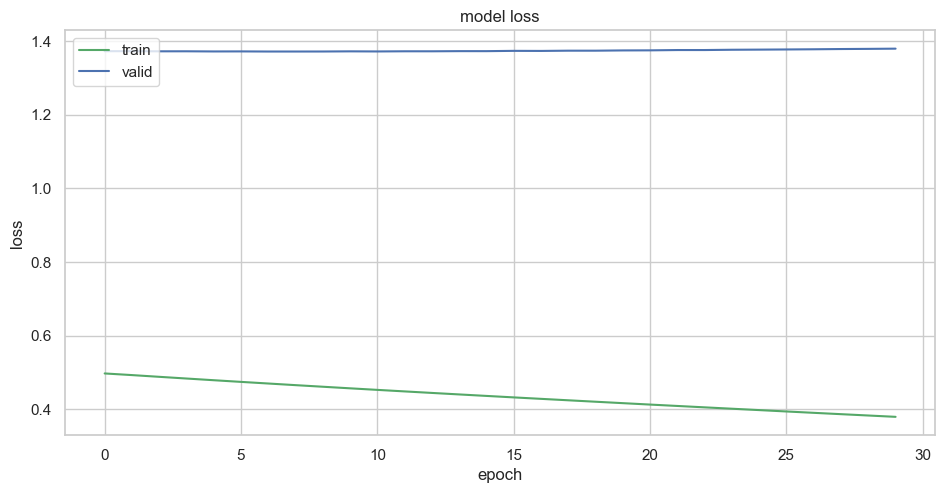

In [69]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
import matplotlib.pyplot as plt
plt.plot(history.history['loss'] , 'g')
plt.plot(history.history['val_loss'] , 'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.grid(True)
plt.show()

In [65]:
# evaluate model
model.evaluate(x=[test_df['user_id'], test_df['movie_id']], y=test_df['rating'])

156/156 [==============================] - 0s 1ms/step - loss: 2.7627


2.7626919746398926

In [70]:
user_embeddings = model.get_layer('user_embedding').get_weights()[0]
movie_embeddings = model.get_layer('movie_embedding').get_weights()[0]

In [71]:
# make recommendations
user_id = 1
user_embedding = user_embeddings[user_id-1]

movie_embeddings_norm = movie_embeddings / np.linalg.norm(movie_embeddings, axis = 1).reshape((-1, 1))
scores = user_embedding.dot(movie_embeddings_norm.T)

In [72]:
top_movies = np.argpartition(scores, -10)[-10:]

In [74]:
top_movies

array([5632, 4763, 2219, 7789, 3853, 5241, 1974, 6875, 2661, 3127],
      dtype=int64)